In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del set de datos
df = pd.read_csv('train.csv')

- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in train.csv only, this denotes whether a tweet is about a real disaster (`1`) or not (`0`)

### Información general del set de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
print('Proporción de relleno de campo "keyword":', \
      round(df['keyword'].dropna().count() / df.shape[0], 2))
print('Proporción de relleno de campo "location":', \
      round(df['location'].dropna().count() / df.shape[0], 2))

Proporción de relleno de campo "keyword": 0.99
Proporción de relleno de campo "location": 0.67


#### Muestra aleatoria del set de datos

In [5]:
df.sample(5)

,id,keyword,location,text,target
574,832,bioterror,NC,FedEx no longer will transport bioterror germs...,0
2012,2888,damage,NaN,New post on my blog: http://t.co/Avu9b4k2rv \n...,0
2219,3176,deluge,NaN,Strange to encaustic cerography portion him ti...,0
3496,4996,explosion,NaN,kindermorgan gas explosion,1
99,143,accident,NaN,only had a car for not even a week and got in ...,1


#### Descripción de variables estadísticas del set de datos

In [6]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


In [7]:
df.loc[df['text'].str.contains('11-Year-Old Boy')]

,id,keyword,location,text,target
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


Hay mensajes que se repiten. Puede tratarse de retweets.

In [8]:
df['location'].nunique()

3341

In [9]:
df['location'].value_counts()[20:30]

San Francisco        14
United Kingdom       14
Washington, D.C.     13
Indonesia            13
Los Angeles          13
NYC                  12
Toronto              12
Ireland              12
Chicago              11
San Francisco, CA    11
Name: location, dtype: int64

In [10]:
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.loc[df['location'] == 'Indonesia'])

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Family members who killed in an airplane's accident,1
882,1277,blood,Indonesia,it wasnt a very big stab but it was a deep stab and theres like blood everwhe,1
1998,2872,damage,Indonesia,'Mages of Fairy Tail.. Specialize in property damage!' - Natsu Dragneel,0
3732,5304,fear,Indonesia,The fear of the Lord is the start of knowledge: but the foolish have no use for wisdom and teaching (Amsal 1:7),0
4737,6736,lava,Indonesia,@YoungHeroesID 4. Lava Blast Power Red #PantherAttack,0
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78,1
5433,7752,police,Indonesia,Police kill hatchet-wielding gunman who opened fire inside Nashville movie theater: AåÊmiddle-aged manåÊarmed wi... http://t.co/tyD47NfL5x,1
5451,7773,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home http://t.co/u30n3fFX8Y,0
5462,7790,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home: A group of armed bounty hunters surrounded the h... http://t.co/dGELJ8rYt9,1
6227,8888,smoke,Indonesia,@TeamAtoWinner no.. i mean when is mino said that he doesn't smoke? u mention it before.. :)),0


Vemos que hay muchos lugares de donde pueden provenir los mensajes. Haciendo un análisis básico, para nada automatizado, en Nigeria, Mumbai, Kenia, Indonesia e India, la mayoría de los mensajes están escritos en inglés. Entonces se puede suponer que la casi totalidad de los mensajes está en inglés.

#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [11]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Búsqueda de duplicados

In [12]:
df.duplicated(subset=['id']).sum()

0

Se deduce que todos los tweets son únicos (no hay ducplicados) y que no hay atributos de `text` nulos. Además todas las filas tienen un `target`.

Ahora hay que analizar las palabras.

### Limpieza de datos

Se va a crear un nuevo DataFrame para almacenar los mensajes procesados.

In [13]:
#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-imaginable destruction.,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting\nhopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijacking http://t.co/EYUGk6byxr,1


In [14]:
import re # Paquete regular expressions.
import string
df_cleaned = df.copy() # Copia del set de datos.

In [15]:
# Función para limpiar el texto de los mensajes.
def clean_text(text):
    # Se convierte el texto a minúsculas.
    text = text.lower()
    # Se quitan los '#'.
    text = re.sub('#', '', text)
    # Se quitan los números.
    text = re.sub('\w*\d\w*', '', text)
    # Se quitan los saltos de línea.
    text = re.sub('\n', ' ', text)
    # Se eliminan las referencias a usuarios '@user'.
    text = re.sub('@\S*', '', text)
    # Se quitan vínculos URL.
    text = re.sub('https{0,1}:\/\/\S*', ' ', text)
    # Se simplifican múltiples espacios a uno solo.
    text = re.sub('(\ ){2,7}', ' ',text)
    # Se quitan los signos de puntuación.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

df_cleaned['text'] = df_cleaned['text'].apply(lambda x: clean_text(x))

#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df_cleaned.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,so you have a new weapon that can cause unimaginable destruction,1
2227,3185,deluge,NaN,the famp things i do for gishwhes just got soaked in a deluge going for pads and tampons thx,0
5448,7769,police,UK,dt rt ûïthe col police can catch a pickpocket in liverpool stree,1
132,191,aftershock,NaN,aftershock back to school kick off was great i want to thank everyone for making it possible what a great night,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma children of addicts develop a defensive self one that decreases vulnerability,0
5559,7934,rainstorm,NaN,you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting hopefully joining her youth collision and i am excite,1
1817,2611,crashed,NaN,ux fail of emv people want to insert and remove quickly like a gas pump stripe reader person told me it crashed the pos,1
6810,9756,tragedy,"Los Angeles, CA",cant find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",the murderous story of americaûªs first hijacking,1


#### Generación de una matriz de términos de todos los mensajes.

In [16]:
# Se combinan todos los mensajes.
text_raw = ' '.join(df_cleaned['text'])
# Se simplifican múltiples espacios a uno solo.
text_raw = re.sub('(\ ){2,7}', ' ',text_raw)
text_raw[0:1000]

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa or days ive lost count flood i

Ahora nos vamos a fijar si las palabras más frecuentes pueden ser consideradas stop words.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(stop_words='english')
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T

data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


In [19]:
# Se renombran la columna.
data_dtm.rename(columns={0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
top_words = data_dtm.sort_values(by='count', ascending=False).head(9)
top_words

,count
like,345
just,320
amp,303
im,300
new,226
people,195
news,192
dont,191
video,165


Tomamos las primeras 9 palabras más repetidas y la agregamos a la lista de stop words.

In [20]:
# El paquete 'text' contiene las stop words.
from sklearn.feature_extraction import text 

stop_words_to_add = top_words.index
stop_words_to_add

Index(['like', 'just', 'amp', 'im', 'new', 'people', 'news', 'dont', 'video'], dtype='object')

In [21]:
# Se agregan las nuevas stop words.
stop_words_new = text.ENGLISH_STOP_WORDS.union(stop_words_to_add)

Ahora se puede limpiar de nuevo el texto de todos los mensajes con las nuevas palabras a ignorar.

In [22]:
cv = CountVectorizer(stop_words=stop_words_new)
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T
data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


Se ve que de 14310 términos se redujo a 14301.

In [23]:
# Se renombran las columnas.
data_dtm.rename(columns={'index':'term', 0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
words_freq_des = data_dtm.sort_values(by='count', ascending=False)
words_freq_des.head(10)

,count
emergency,157
disaster,153
police,141
body,125
burning,120
crash,118
storm,117
california,117
suicide,116
got,112


In [24]:
dictionary = words_freq_des['count'].to_dict()
dictionary

{'emergency': 157,
 'disaster': 153,
 'police': 141,
 'body': 125,
 'burning': 120,
 'crash': 118,
 'storm': 117,
 'california': 117,
 'suicide': 116,
 'got': 112,
 'know': 112,
 'day': 112,
 'time': 112,
 'buildings': 111,
 'man': 111,
 'rt': 108,
 'bomb': 104,
 'world': 103,
 'going': 103,
 'nuclear': 102,
 'fires': 100,
 'love': 100,
 'attack': 99,
 'killed': 96,
 'dead': 96,
 'train': 93,
 'war': 91,
 'car': 91,
 'hiroshima': 89,
 'good': 89,
 'today': 89,
 'families': 88,
 'life': 87,
 'accident': 87,
 'think': 86,
 'say': 86,
 'ûªs': 85,
 'watch': 85,
 'want': 80,
 'years': 79,
 'did': 79,
 'way': 78,
 'make': 77,
 'home': 77,
 'collapse': 75,
 'work': 74,
 'look': 73,
 'best': 73,
 'help': 72,
 'need': 72,
 'army': 71,
 'wildfire': 71,
 'really': 71,
 'mass': 71,
 'death': 71,
 'lol': 70,
 'year': 70,
 'let': 69,
 'bombing': 68,
 'pm': 68,
 'right': 68,
 'youre': 67,
 'hot': 66,
 'black': 66,
 'school': 66,
 'forest': 65,
 'fatal': 65,
 'northern': 64,
 'read': 64,
 'water': 63,

Ahora se pueden usar todas las stop words para generar la nube de palabras.

In [25]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words_new, background_color="white", colormap="Dark2", \
               max_font_size=150, max_words=100, scale=5, random_state=42) #scale > 1 mejora la resolución del plot.

In [1]:
plt.figure(figsize = (16,8))

'''La instancia wc de WordCloud puede generar la nube a partir de la frecuencia
de las palabras. Pero para eso necesita un dictionario con las frecuencias.'''

wc.generate_from_frequencies(dictionary)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

NameError: name 'plt' is not defined

---
---
### Análisis de Keywords

In [27]:
df_cleaned['keyword'].nunique()

221

In [28]:
df_cleaned['keyword'].value_counts()[0:20]

fatalities     45
armageddon     42
deluge         42
harm           41
sinking        41
body%20bags    41
damage         41
collided       40
fear           40
windstorm      40
siren          40
twister        40
evacuate       40
outbreak       40
wreckage       39
weapons        39
whirlwind      39
weapon         39
earthquake     39
sinkhole       39
Name: keyword, dtype: int64

Algunas keywords aparecen con `%20`. Veamos qué son.

In [29]:
df_cleaned.loc[df_cleaned['keyword'].str.contains('%20', na=False)]['keyword'].value_counts()

body%20bags              41
oil%20spill              38
burning%20buildings      37
nuclear%20reactor        36
dust%20storm             36
cliff%20fall             36
structural%20failure     35
suicide%20bomb           35
airplane%20accident      35
bridge%20collapse        35
emergency%20plan         35
buildings%20burning      35
heat%20wave              34
loud%20bang              34
natural%20disaster       34
nuclear%20disaster       34
fire%20truck             33
violent%20storm          33
suicide%20bombing        33
emergency%20services     33
blew%20up                33
body%20bag               33
body%20bagging           33
buildings%20on%20fire    33
mass%20murder            33
blown%20up               33
chemical%20emergency     33
mass%20murderer          32
forest%20fires           32
suicide%20bomber         31
wild%20fires             31
first%20responders       29
bush%20fires             25
war%20zone               24
forest%20fire            19
radiation%20emergenc

Todos estos casos parecen necesitar un guión `-` en lugar de `%20`.

In [30]:
df_cleaned.replace(to_replace={'%20':'-'}, inplace=True, regex=True)
# regex=True para reemplazar expresiones dentro del string.

Se genera el diccionario con las palabras corregidas.

In [31]:
# value_counts() devuelve una Serie ordenada de forma descendente.
# También ignora los NaN
dict_keywords = df_cleaned['keyword'].value_counts().to_dict()
dict_keywords

{'fatalities': 45,
 'deluge': 42,
 'armageddon': 42,
 'damage': 41,
 'harm': 41,
 'sinking': 41,
 'body-bags': 41,
 'outbreak': 40,
 'siren': 40,
 'collided': 40,
 'twister': 40,
 'fear': 40,
 'evacuate': 40,
 'windstorm': 40,
 'hellfire': 39,
 'weapon': 39,
 'famine': 39,
 'flames': 39,
 'weapons': 39,
 'sunk': 39,
 'explosion': 39,
 'derailment': 39,
 'wreckage': 39,
 'whirlwind': 39,
 'sinkhole': 39,
 'wrecked': 39,
 'earthquake': 39,
 'collision': 39,
 'thunder': 38,
 'bombed': 38,
 'oil-spill': 38,
 'deaths': 38,
 'blaze': 38,
 'hurricane': 38,
 'ambulance': 38,
 'upheaval': 38,
 'flooding': 38,
 'fire': 38,
 'typhoon': 38,
 'drowned': 38,
 'explode': 38,
 'derailed': 38,
 'injury': 38,
 'fatal': 38,
 'sandstorm': 37,
 'ruin': 37,
 'police': 37,
 'mudslide': 37,
 'fatality': 37,
 'wreck': 37,
 'debris': 37,
 'burning-buildings': 37,
 'crush': 37,
 'bioterror': 37,
 'emergency': 37,
 'curfew': 37,
 'blizzard': 37,
 'pandemonium': 37,
 'wounded': 37,
 'panic': 37,
 'destroy': 37,
 '

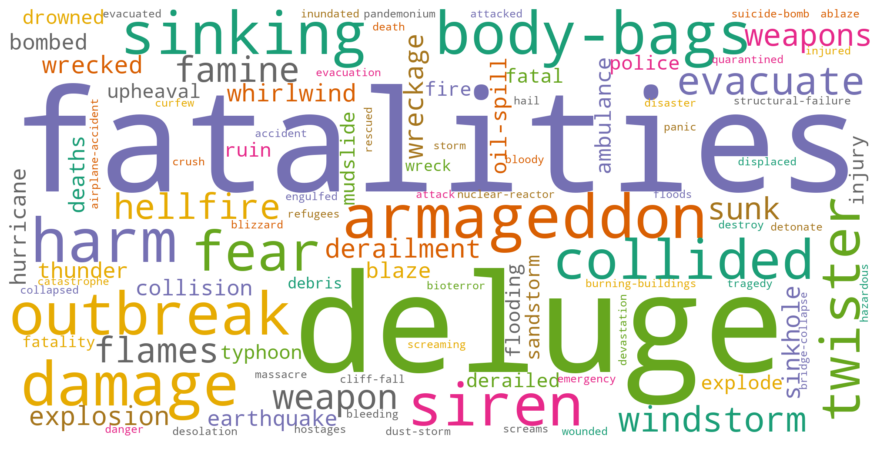

In [32]:
plt.figure(figsize = (16,8))

wc.generate_from_frequencies(dict_keywords)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

In [33]:
keywords_freq = df_cleaned['keyword'].value_counts().head(50)
keywords_freq.head(5)

fatalities    45
deluge        42
armageddon    42
damage        41
harm          41
Name: keyword, dtype: int64

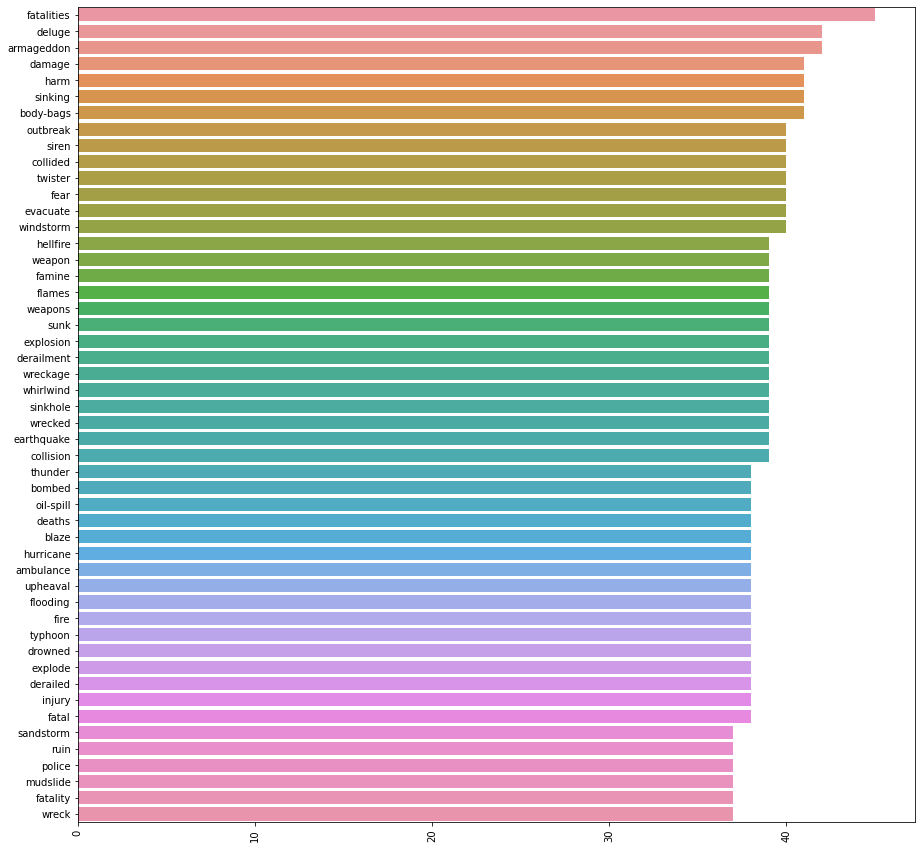

In [34]:
plt.figure(figsize=(15,15))

kw = keywords_freq.index
counts = keywords_freq.values

plot = sns.barplot(x = counts, y = kw, orient = 'h')
plt.xticks(rotation=90)

plt.show()

---
---
### Análisis de veracidad del mensaje según su longitud

In [35]:
# Se agrega un columna para la longitud del mensaje.
df['length'] = df['text'].str.len()
# Se informan las mediciones pedidas.
print('Características de longitud del texto del mensaje')
print('Máxima:', df['length'].max(), \
'\tMínina:', df['length'].min(), \
'\tMedia:', np.round(df['length'].mean(), decimals = 0))

Características de longitud del texto del mensaje
Máxima: 157 	Mínina: 7 	Media: 101.0


In [36]:
# Se arma nuevo DataFrame agrupando por longitud de mensaje
join = pd.DataFrame()
join['is_true'] = df.groupby('length')['target'].agg('sum')
join['total'] = df.groupby('length')['target'].agg('count')
join['portion_is_true'] = round(join['is_true'] / join['total'], 3)
# Se quitan los casos extremos.
clean = join.loc[join['portion_is_true'] < 1]
clean = clean.loc[clean['portion_is_true'] > 0]
# Se quitan los casos con pocas ocurrencias. Tienen que tener más de 10.
clean = clean.loc[clean['total'] > 10]
display(clean.nlargest(5, 'portion_is_true'))
print('Promedio de las cinco longitudes con mejor índice de veracidad:', \
clean.nlargest(5, 'portion_is_true').index.values.mean())
print('Mediana de las cinco longitudes con mejor índice de veracidad:', \
np.median(clean.nlargest(5, 'portion_is_true').index.values))

,is_true,total,portion_is_true
length,,,
136,277.0,401,0.691
91,60.0,88,0.682
135,119.0,191,0.623
116,40.0,67,0.597
137,125.0,210,0.595


Promedio de las cinco longitudes con mejor índice de veracidad: 123.0
Mediana de las cinco longitudes con mejor índice de veracidad: 135.0


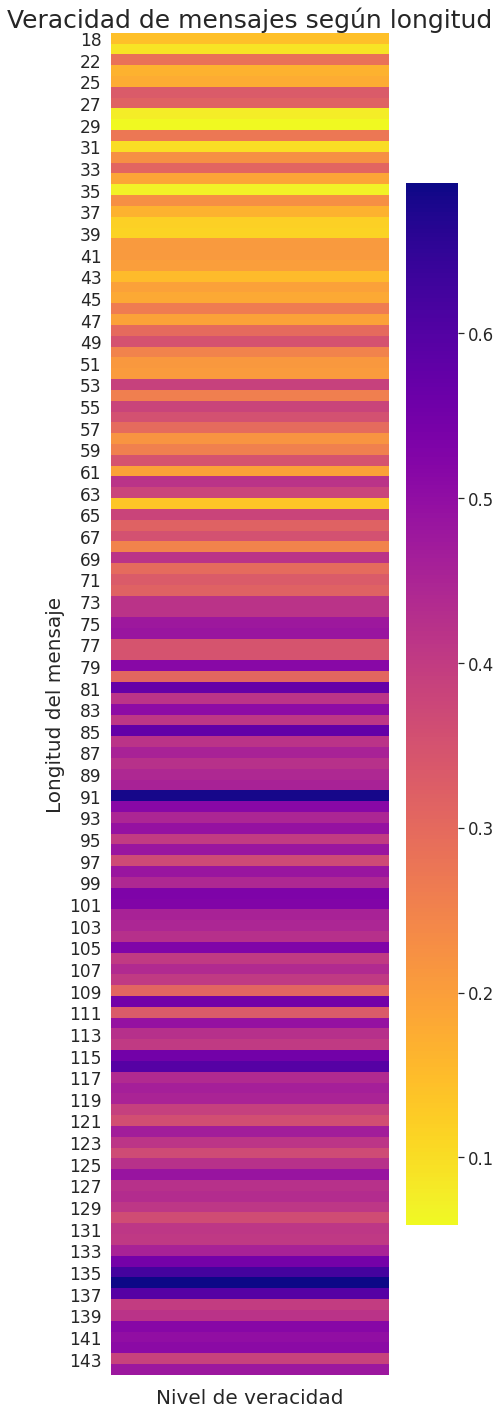

In [38]:
00plt.figure(figsize = (7,20))
sns.set(font_scale = 1.5)
plot = sns.heatmap(clean[['portion_is_true']], cmap = 'plasma_r', \
cbar = True, xticklabels = [''])
plt.title('Veracidad de mensajes según longitud',fontsize = 25)
plot.set_xlabel('Nivel de veracidad', fontsize = 20)
plot.set_ylabel('Longitud del mensaje', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.tight_layout() # Para que no recorte los títulos.
plt.show()